# Data Project 



Analysing data from the Global Abortion Incidence Dataset (https://osf.io/5k7fp/)

Imports: 

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopandas 

In [3]:
%matplotlib inline

Set the size of plots in inches:

In [117]:
plt.rcParams['figure.figsize'] = (10, 5)

In [5]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

Load CSV file: 

In [118]:
if os.path.isfile("global_abortion_incidence_dataset.csv"):
    filepath = "global_abortion_incidence_dataset.csv"
    print("loading from file")
else:
    filepath = "https://osf.io/6t4eh"
    print("loading from the internet")

df = pd.read_csv(filepath)
print("done")

loading from file
done


Finding out the kind of data columns in the dataset:

In [7]:
df.columns

Index(['country', 'iso', 'yearstart', 'yearend', 'region', 'subregion',
       'numberofabortions', 'abortionrate', 'perc_p_ending_in_a',
       'spontaneous', 'datatype', 'datasource', 'complete', 'classification',
       'modelused', 'marriedonly', 'notes'],
      dtype='object')

Row 1 data for reference provides: 

In [119]:
row_one = df.iloc[1]
row_one

country                                   Albania
iso                                           8.0
yearstart                                    1991
yearend                                      1991
region                Europe and Northern America
subregion                         Southern Europe
numberofabortions                         20300.0
abortionrate                                  NaN
perc_p_ending_in_a                            NaN
spontaneous                                    No
datatype                      Official Statistics
datasource                           Henshaw 2001
complete                               Incomplete
classification              Below survey of women
modelused                                     Yes
marriedonly                                   NaN
notes                                         NaN
Name: 1, dtype: object

## Analysis of participating subregions and countries: 

Analysis of the count of entries in regions or countries, across years, as a proxy to the level of participation and documentation of abortion incidences in these areas.

Text(0, 0.5, 'Count of entries')

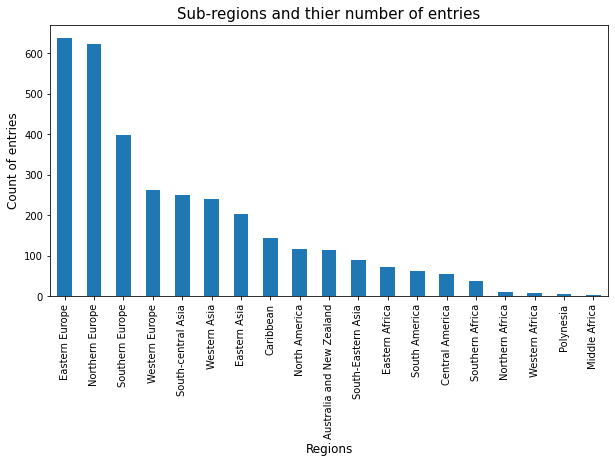

In [296]:
sub_v = df["subregion"].value_counts()
sub_v.plot(kind="bar")
plt.title("Sub-regions and thier number of entries", fontsize=15)
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Count of entries', fontsize=12)

Countires with more than 50 entries in dataset:

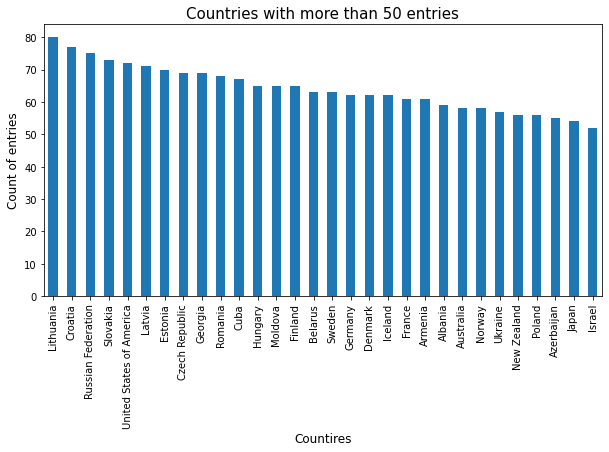

In [175]:
count_v = df["country"].value_counts()
count_v[count_v>50].plot(kind="bar")
plt.title("Countries with more than 50 entries", fontsize=15)
plt.xlabel('Countires', fontsize=12)
plt.ylabel('Count of entries', fontsize=12)
plt.rcParams['figure.figsize'] = (10, 5)

Countries with less than 10 entries in dataset

Text(0, 0.5, 'Count of entries')

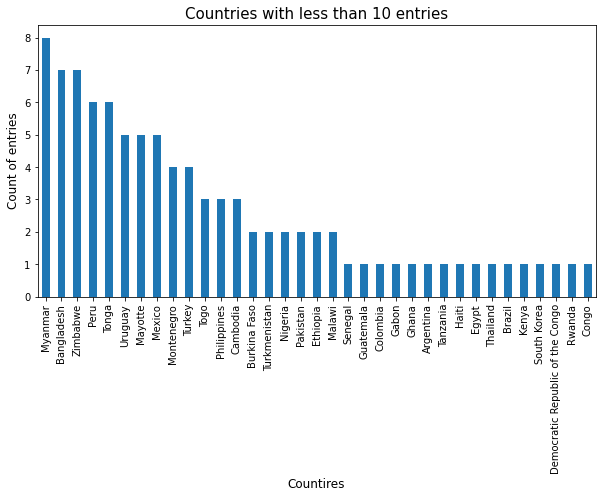

In [176]:
count_v[count_v<10].plot(kind="bar")
plt.title("Countries with less than 10 entries", fontsize=15)
plt.xlabel('Countires', fontsize=12)
plt.ylabel('Count of entries', fontsize=12)

Countries' entries to dataset have not been consistently provided across all years, the following visualises the consecutive entry of countries across years in the dataset.

In [297]:
country_data = []
for name, c_df in df.groupby("country"):
    country_data.append(
        {
            "country": name,
            "first_year": int(c_df.yearstart.min()),
            "last_year": int(c_df.yearstart.max()),
        }
    )
country_range = pd.DataFrame(country_data)


In [298]:
plt.rcParams['figure.figsize'] = (30, 30)

Text(0.5, 1.0, 'Years countries have participated')

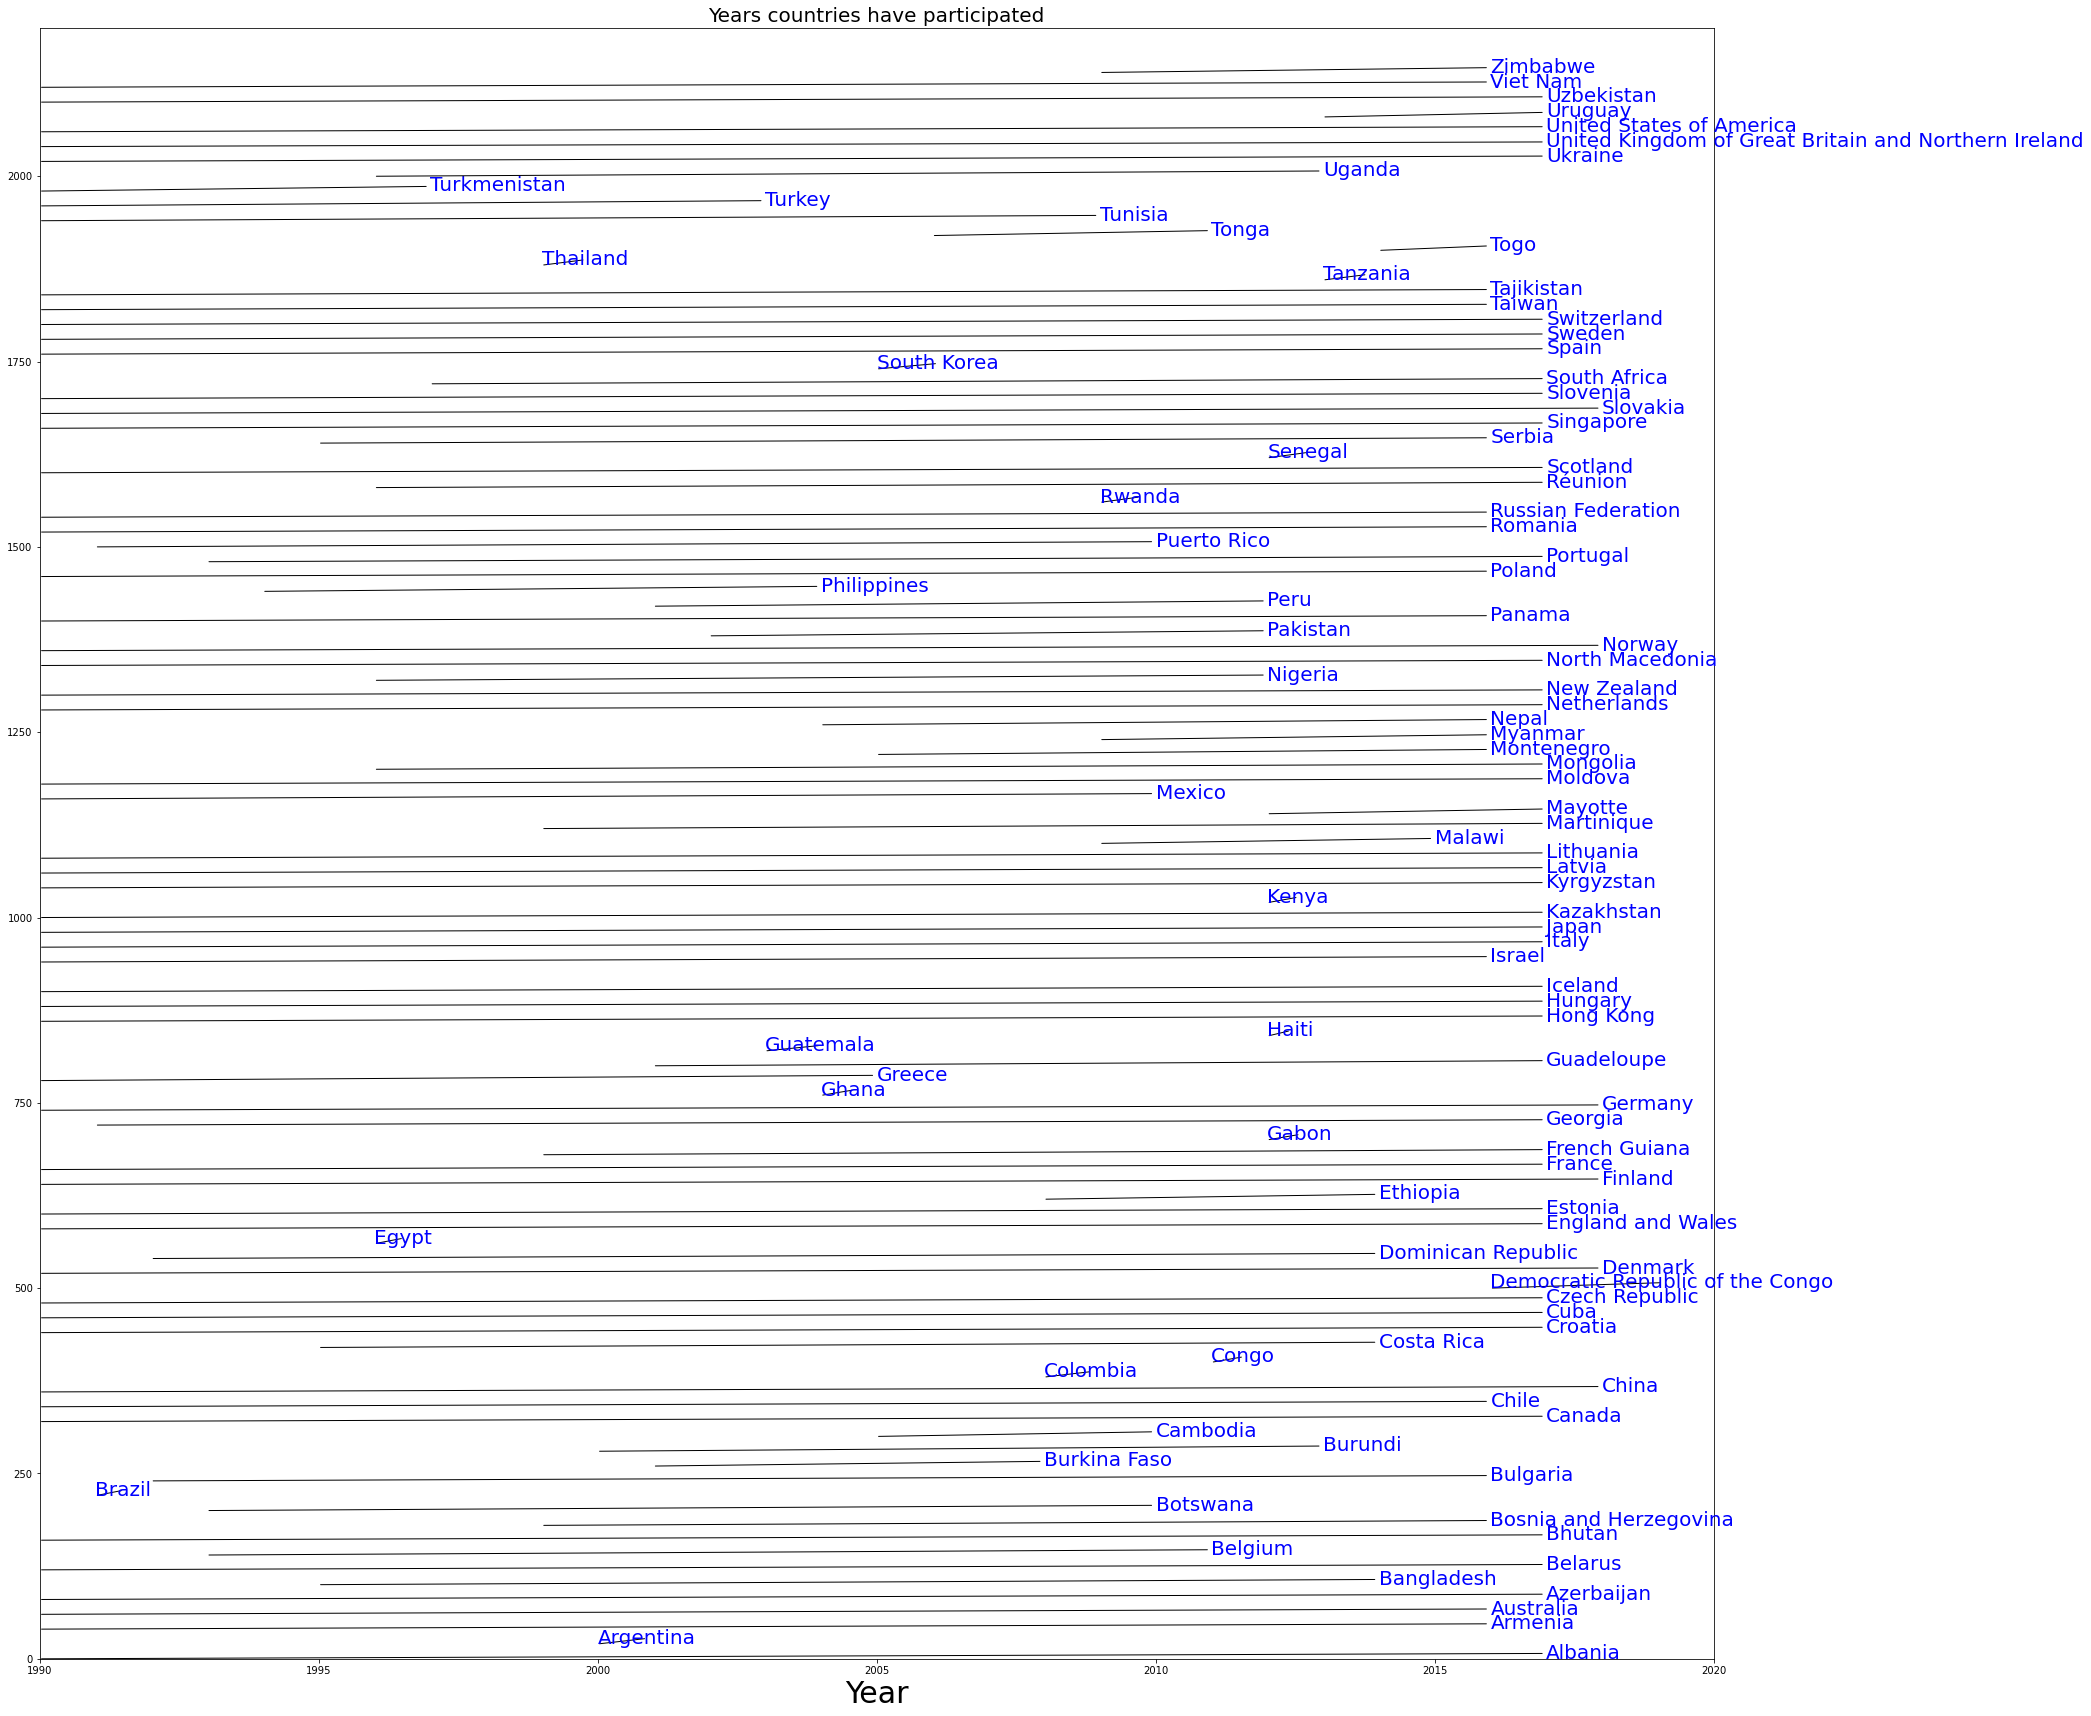

In [299]:
fig, ax = plt.subplots()
for i, row in country_range.iterrows():
    ax.annotate(
        row.country,
        xy=(row.first_year, i*20),
        xycoords="data",
        xytext=(row.last_year, i*20),
        textcoords="data",
        arrowprops=dict(arrowstyle="-"),
        size = 20,
        c = "blue"
    )
plt.xlim([1990,2020])
plt.ylim([0,2200])
plt.xlabel('Year', fontsize=30)
plt.title("Years countries have participated", fontsize=20)



## Analysing data type:

In [300]:
plt.rcParams['figure.figsize'] = (10, 5)

Analysis of entries by count of data type to see the ways in which entries are being collected

Text(0, 0.5, 'Count of entries')

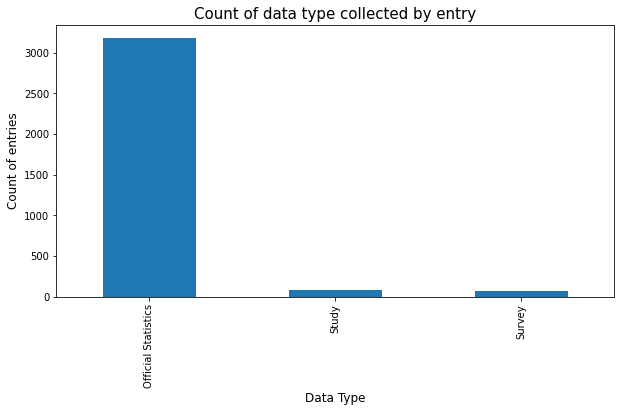

In [301]:
datatype_c= df["datatype"].value_counts()
datatype_c.plot(kind="bar")
plt.title("Count of data type collected by entry", fontsize=15)
plt.xlabel('Data Type', fontsize=12)
plt.ylabel('Count of entries', fontsize=12)


Analysis of the correlation of number of abortions to data type

Text(0, 0.5, 'No. of abortions')

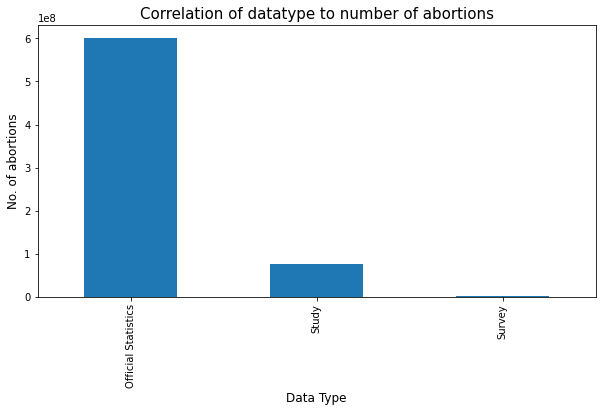

In [302]:
datatype_no = df.groupby(["datatype"])["numberofabortions"].sum()
datatype_no.plot(kind="bar")
plt.title("Correlation of datatype to number of abortions", fontsize=15)
plt.xlabel('Data Type', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)

Analysis of the number of abortions collected through various data types over years 

Text(0, 0.5, 'No. of abortions')

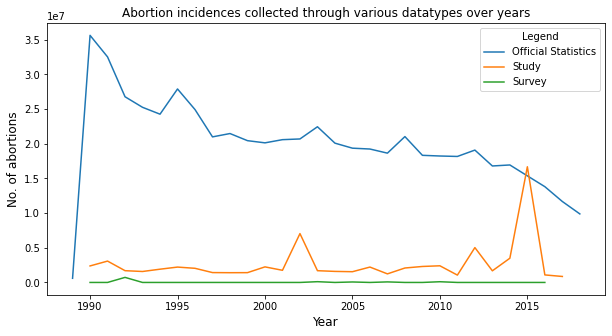

In [303]:
legend_labels = []
for datatype_name, sub_df in df.groupby("datatype"):
    sub_df.groupby("yearstart").sum().numberofabortions.plot()
    legend_labels.append(datatype_name)
plt.title("Abortion incidences collected through various datatypes over years")
plt.legend(legend_labels, title='Legend')
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)

Text(0, 0.5, 'No. of abortions')

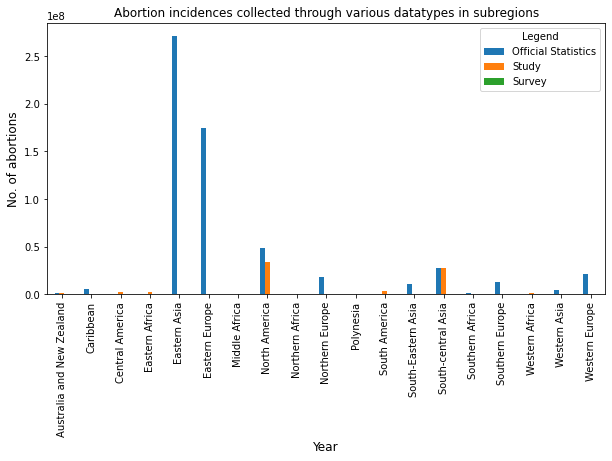

In [373]:
df.groupby(["subregion","datatype"])["numberofabortions"].sum().unstack().plot(kind="bar")
plt.title("Abortion incidences collected through various datatypes in subregions")
plt.legend(title='Legend')
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)

Text(0, 0.5, 'No. of abortions')

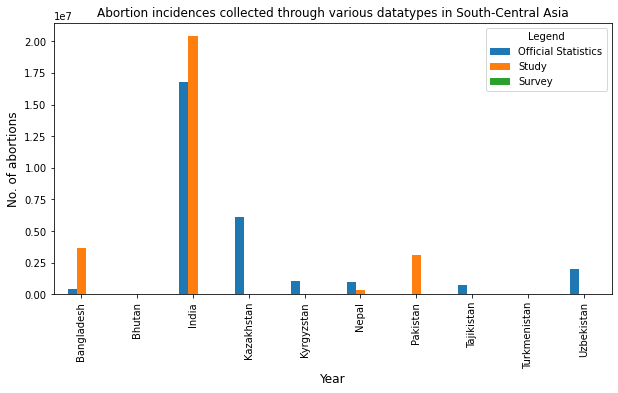

In [375]:
df_subregion = df[df.subregion=="South-central Asia"]
df_subregion.groupby(["country", "datatype"])["numberofabortions"].sum().unstack().plot(kind="bar")
plt.title("Abortion incidences collected through various datatypes in South-Central Asia")
plt.legend(title='Legend')
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)

In [482]:
df_country=df[df.country=="India"]
datatype_dive=df_country.groupby(["yearstart", "datatype"]).sum()
datatype_dive

,,iso,yearend,numberofabortions,abortionrate,perc_p_ending_in_a
yearstart,datatype,,,,,
1989,Official Statistics,356.0,1990,596357.0,0.0,0.0
1990,Official Statistics,356.0,1990,596345.0,0.0,0.0
1991,Official Statistics,712.0,3983,1217671.0,0.0,0.0
1992,Official Statistics,356.0,1993,606015.0,0.0,0.0
1993,Official Statistics,356.0,1994,612291.0,0.0,0.0
1994,Official Statistics,356.0,1995,627748.0,0.0,0.0
1995,Official Statistics,712.0,3992,1141828.0,0.0,0.0
1996,Official Statistics,712.0,3994,1076150.0,0.0,0.0
1997,Official Statistics,712.0,3996,1025646.0,0.0,0.0


In [480]:
df_country.loc[df["datatype"] == "Study"]

,country,iso,yearstart,yearend,region,subregion,numberofabortions,abortionrate,perc_p_ending_in_a,spontaneous,datatype,datasource,complete,classification,modelused,marriedonly,notes
1501,India,356.0,2002,2002,Central and Southern Asia,South-central Asia,4800000.0,NaN,NaN,No,Study,Duggal and Ramachandran 2004,NaN,NaN,Yes,All women,NaN
1508,India,356.0,2015,2015,Central and Southern Asia,South-central Asia,15644748.0,47.0,NaN,No,Study,Singh et al 2018,NaN,NaN,Yes,All women,NaN


#### Introduction summary of study "The incidence of abortion and unintended pregnancy in India, 2015" by Susheela Singh et al.

"Reliable, current information on the incidence of induced abortion in India is not available... 

Statistics compiled by the Indian Government on the number of abortions provided in facilities are known to greatly underestimate abortion incidence because coverage of facility-based services is incomplete and in addition, many abortions occur outside of a facility setting... 

In some surveys, women in India are asked about abortion experience, but direct questions to women are known to result in very high under-reporting because of stigma... 

This evidence gap not only hinders the government's ability to design policies and programmes on reproductive health but also weakens global estimates of abortion incidence."

## Analysing abortion incidences:

Analysing number of abortion incidences by region

Text(0, 0.5, 'No of abortions')

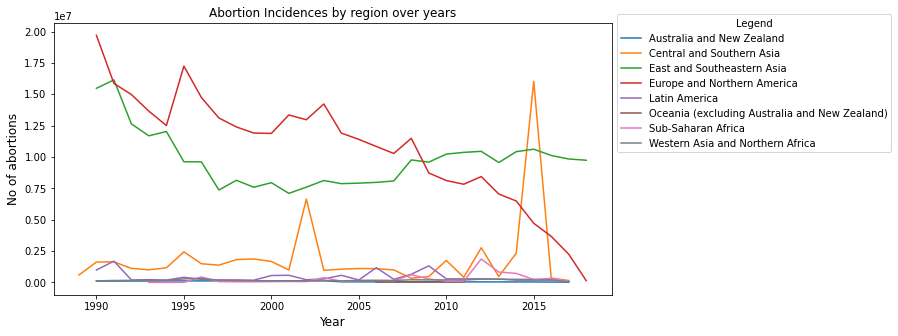

In [483]:
legend_labels = []
for region_name, sub_df in df.groupby("region"):
    sub_df.groupby("yearstart").sum().numberofabortions.plot()
    legend_labels.append(region_name)
plt.title("Abortion Incidences by region over years")
plt.legend(legend_labels, title='Legend', bbox_to_anchor=(1, 1.05))
plt.xlabel('Year', fontsize=12)
plt.ylabel('No of abortions', fontsize=12)


Text(0, 0.5, 'No of abortions')

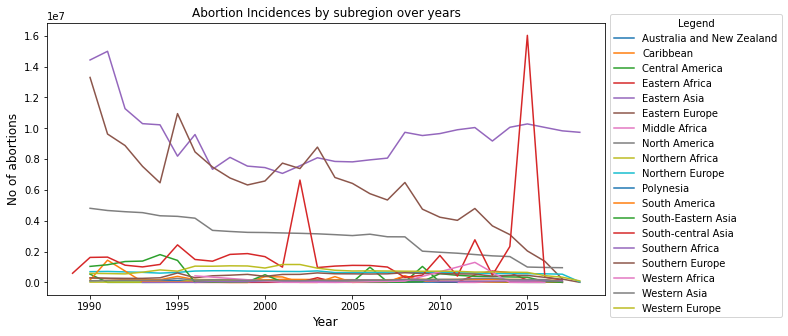

In [484]:
legend_labels = []
for region_name, sub_df in df.groupby("subregion"):
    sub_df.groupby("yearstart").sum().numberofabortions.plot()
    legend_labels.append(region_name)
plt.title("Abortion Incidences by subregion over years")
plt.legend(legend_labels, title='Legend', bbox_to_anchor=(1, 1.05))
plt.xlabel('Year', fontsize=12)
plt.ylabel('No of abortions', fontsize=12)


Analysing number of abortion incidences by region normalised by only looking at 'Official Statistics'

Text(0, 0.5, 'No of abortions')

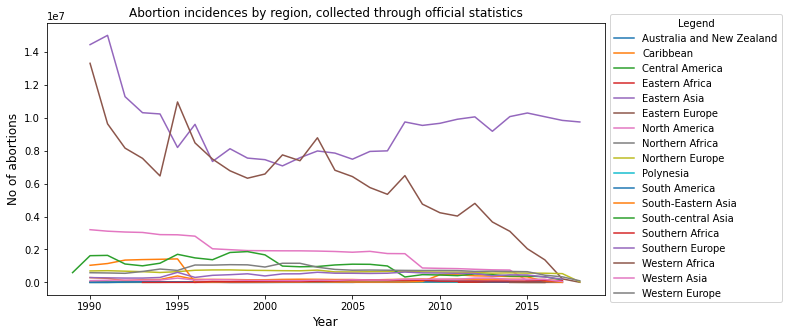

In [294]:
legend_labels = []
for region_name, sub_df in df[df.datatype=="Official Statistics"].groupby("subregion"):
    sub_df.groupby("yearstart").sum().numberofabortions.plot()
    legend_labels.append(region_name)
plt.title("Abortion incidences by region, collected through official statistics")
plt.legend(legend_labels, title='Legend', bbox_to_anchor=(1, 1.05))
plt.xlabel('Year', fontsize=12)
plt.ylabel('No of abortions', fontsize=12)

<AxesSubplot:xlabel='subregion'>

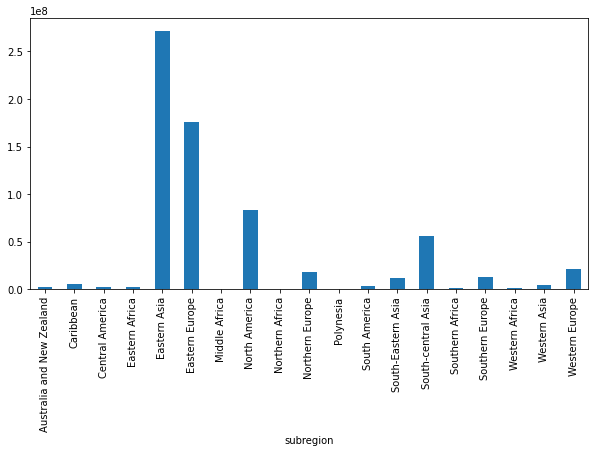

In [158]:
nabort_datatype = df.groupby(["subregion"])["numberofabortions"].sum()
nabort_datatype.plot(kind="bar")

Text(0, 0.5, 'No. of abortions')

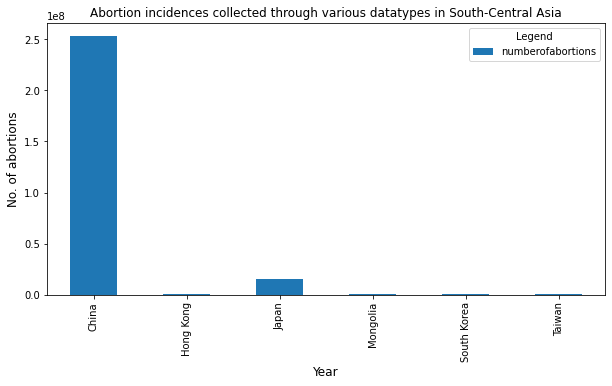

In [421]:
df_subregion = df[df.subregion=="Eastern Asia"]
df_subregion.groupby(["country"])["numberofabortions"].sum().plot(kind="bar")
plt.title("Abortion incidences collected through various datatypes in South-Central Asia")
plt.legend(title='Legend')
plt.xlabel('Year', fontsize=12)
plt.ylabel('No. of abortions', fontsize=12)

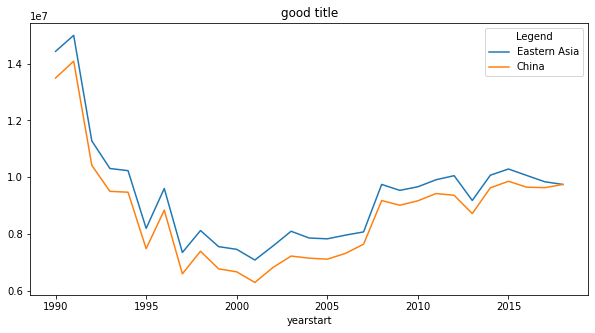

In [422]:
df[df.subregion == "Eastern Asia"].groupby(
    "yearstart"
).sum().numberofabortions.plot()

df[df.country == "China"].groupby(
    "yearstart"
).sum().numberofabortions.plot()

plt.title("good title")
plt.legend(["Eastern Asia", "China"], title='Legend')

In [22]:
nabort_percend = df.groupby(["perc_p_ending_in_a"])["numberofabortions"].sum()
nabort_percend

perc_p_ending_in_a
10.0         0.0
11.3         0.0
14.5         0.0
14.8    161975.0
17.9         0.0
Name: numberofabortions, dtype: float64

## Analysing abortion rate:

Text(0, 0.5, 'bin of 10')

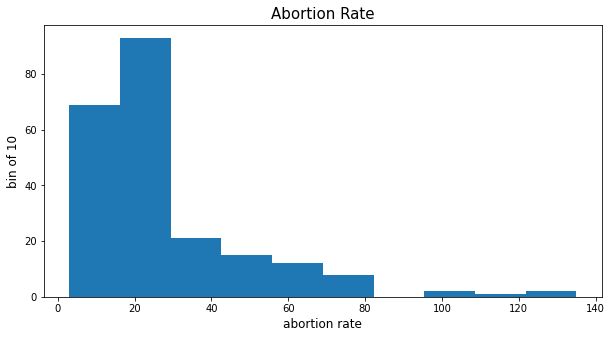

In [23]:
#observed rate of abortions per 1000 women of reproductive age within the country and year
num_of_bins = 10

abortr = df["abortionrate"]
plt.hist(abortr, bins=num_of_bins)
plt.title("Abortion Rate", fontsize=15)
plt.xlabel('abortion rate', fontsize=12)
plt.ylabel('bin of 10', fontsize=12)

## Analysing abortion incidences: 

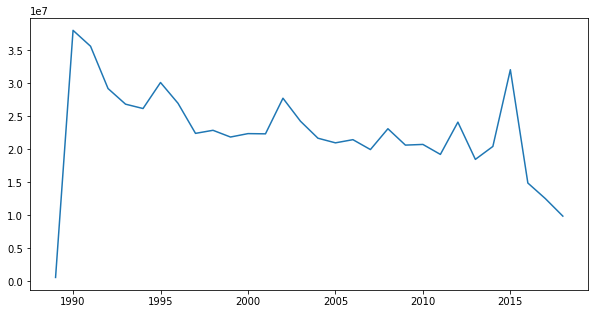

In [167]:
nabort_year = df.groupby(["yearstart"])["numberofabortions"].sum()
plt.plot(nabort_year)

<AxesSubplot:xlabel='subregion'>

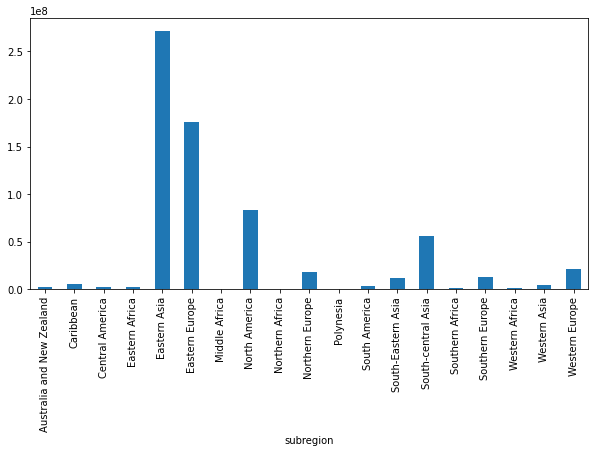

In [163]:
nabort_region = df.groupby(["subregion"])["numberofabortions"].sum()
nabort_region.plot(kind="bar")

WANT TO SORT VALUES BE DESCENDING

WANT TO DIG DEEPER INTO EASTERN ASIA DATA, THE HIGHEST SUM OF ABORTIONS

<AxesSubplot:xlabel='subregion,datatype'>

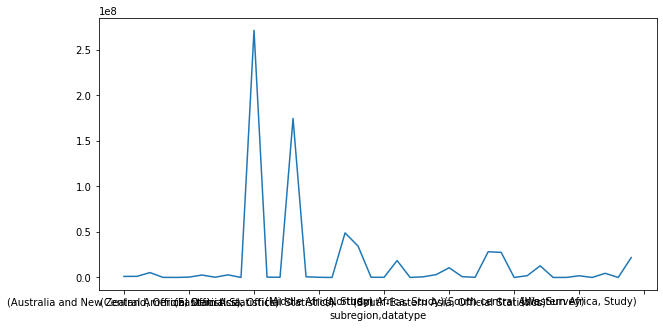

In [408]:
nabort_region_type = df.groupby(["subregion", "datatype"])["numberofabortions"].sum()
nabort_region_type.plot()

CAN I VISUALISE THIS?

In [29]:
df.sort_values("numberofabortions", ascending=False).head(10)

,country,iso,yearstart,yearend,region,subregion,numberofabortions,abortionrate,perc_p_ending_in_a,spontaneous,datatype,datasource,complete,classification,modelused,marriedonly,notes
1508,India,356.0,2015,2015,Central and Southern Asia,South-central Asia,15644748.0,47.0,NaN,No,Study,Singh et al 2018,NaN,NaN,Yes,All women,NaN
541,China,156.0,1991,1991,East and Southeastern Asia,Eastern Asia,14086313.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Complete,NaN,Yes,NaN,NaN
540,China,156.0,1990,1990,East and Southeastern Asia,Eastern Asia,13493926.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Complete,NaN,Yes,NaN,NaN
542,China,156.0,1992,1992,East and Southeastern Asia,Eastern Asia,10416287.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN
565,China,156.0,2015,2015,East and Southeastern Asia,Eastern Asia,9851961.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN
568,China,156.0,2018,2018,East and Southeastern Asia,Eastern Asia,9740000.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN
566,China,156.0,2016,2016,East and Southeastern Asia,Eastern Asia,9645000.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN
567,China,156.0,2017,2017,East and Southeastern Asia,Eastern Asia,9627000.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN
564,China,156.0,2014,2014,East and Southeastern Asia,Eastern Asia,9621995.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN
543,China,156.0,1993,1993,East and Southeastern Asia,Eastern Asia,9496119.0,NaN,NaN,No,Official Statistics,National Bureau of Statistics of China,Incomplete,Implausible trend,Yes,NaN,NaN


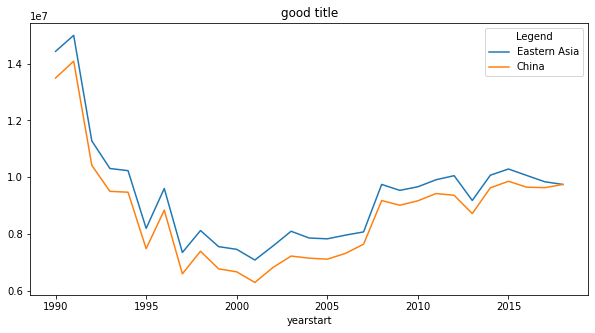

In [30]:
df[df.subregion == "Eastern Asia"].groupby(
    "yearstart"
).sum().numberofabortions.plot()

df[df.country == "China"].groupby(
    "yearstart"
).sum().numberofabortions.plot()

plt.title("good title")
plt.legend(["Eastern Asia", "China"], title='Legend')


In [31]:
df.sort_values("abortionrate", ascending=False).head(10)

,country,iso,yearstart,yearend,region,subregion,numberofabortions,abortionrate,perc_p_ending_in_a,spontaneous,datatype,datasource,complete,classification,modelused,marriedonly,notes
1156,Georgia,268.0,1996,1999,Western Asia and Northern Africa,Western Asia,NaN,135.0,NaN,No,Survey,1999 Georgia RHS,NaN,NaN,Yes,All women,NaN
2409,Romania,642.0,1992,1992,Europe and Northern America,Eastern Europe,729613.0,129.5,NaN,No,Survey,1993 Romania RHS,NaN,NaN,Yes,All women,NaN
77,Azerbaijan,31.0,1998,2001,Western Asia and Northern Africa,Western Asia,NaN,116.0,NaN,No,Survey,2001 Azerbaijan RHS,NaN,NaN,Yes,All women,NaN
1172,Georgia,268.0,2002,2005,Western Asia and Northern Africa,Western Asia,NaN,104.0,NaN,No,Survey,2005 Georgia RHS,NaN,NaN,Yes,All women,NaN
2488,Russian Federation,643.0,1996,1996,Europe and Northern America,Eastern Europe,NaN,99.3,NaN,No,Survey,1996 Russia WRHS,NaN,NaN,Yes,All women,Perm City only
199,Armenia,51.0,2000,2000,Western Asia and Northern Africa,Western Asia,NaN,81.0,NaN,No,Survey,2000 Armenia DHS,NaN,NaN,Yes,All women,NaN
2490,Russian Federation,643.0,1996,1996,Europe and Northern America,Eastern Europe,NaN,79.4,NaN,No,Survey,1996 Russia WRHS,NaN,NaN,Yes,All women,Yekaterinburg City only
2491,Russian Federation,643.0,1996,1996,Europe and Northern America,Eastern Europe,NaN,77.1,NaN,No,Survey,1996 Russia WRHS,NaN,NaN,Yes,All women,Ivanovo Oblast only
2425,Romania,642.0,1996,1999,Europe and Northern America,Eastern Europe,NaN,74.0,NaN,No,Survey,1999 Romania RHS,NaN,NaN,Yes,All women,NaN
705,Cuba,192.0,1990,1990,Latin America,Caribbean,NaN,72.9,NaN,No,Official Statistics,Gran Álvarez and López Nistal 2003,Complete,NaN,Yes,NaN,"Rate is per 1,000 women ages 12-49"


In [32]:
df.sort_values("numberofabortions", ascending=False).tail(10)

,country,iso,yearstart,yearend,region,subregion,numberofabortions,abortionrate,perc_p_ending_in_a,spontaneous,datatype,datasource,complete,classification,modelused,marriedonly,notes
3037,Uganda,800.0,2006,2007,Sub-Saharan Africa,Eastern Africa,NaN,8.0,NaN,Yes,Survey,Asiki et al 2015,NaN,NaN,Yes,All women,NaN
3038,Uganda,800.0,2007,2008,Sub-Saharan Africa,Eastern Africa,NaN,11.4,NaN,Yes,Survey,Asiki et al 2015,NaN,NaN,Yes,All women,NaN
3039,Uganda,800.0,2008,2009,Sub-Saharan Africa,Eastern Africa,NaN,10.3,NaN,Yes,Survey,Asiki et al 2015,NaN,NaN,Yes,All women,NaN
3040,Uganda,800.0,2009,2010,Sub-Saharan Africa,Eastern Africa,NaN,8.7,NaN,Yes,Survey,Asiki et al 2015,NaN,NaN,Yes,All women,NaN
3041,Uganda,800.0,2010,2011,Sub-Saharan Africa,Eastern Africa,NaN,10.1,NaN,Yes,Survey,Asiki et al 2015,NaN,NaN,Yes,All women,NaN
3043,Uganda,800.0,2012,2013,Sub-Saharan Africa,Eastern Africa,NaN,12.5,NaN,Yes,Survey,Asiki et al 2015,NaN,NaN,Yes,All women,NaN
3057,Ukraine,804.0,1999,1999,Europe and Northern America,Eastern Europe,NaN,54.0,NaN,No,Survey,1999 Ukraine RHS,NaN,NaN,Yes,All women,NaN
3076,Ukraine,804.0,2004,2007,Europe and Northern America,Eastern Europe,NaN,15.0,NaN,No,Survey,2007 Ukraine DHS,NaN,NaN,Yes,All women,NaN
3245,Uzbekistan,860.0,1993,1996,Central and Southern Asia,South-central Asia,NaN,20.0,NaN,No,Survey,1996 Uzbekistan DHS,NaN,NaN,Yes,All women,NaN
3251,Uzbekistan,860.0,2000,2002,Central and Southern Asia,South-central Asia,NaN,27.0,NaN,No,Survey,2002 Uzbekistan HES,NaN,NaN,Yes,All women,NaN


In [34]:
# Plot by GDP per capita
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


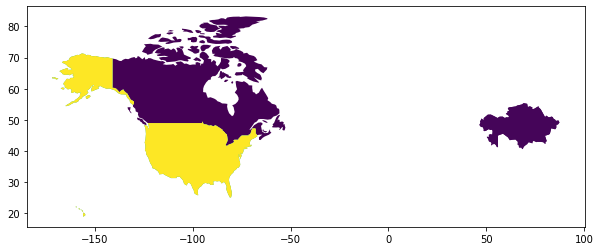

In [358]:
df_year = df[df.yearstart==2010]
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.merge(df_year, left_on="name", right_on="country").head()

# world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column="numberofabortions");

In [183]:

world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap');

NameError: name 'world' is not defined